Pn(1.0384615384615385) = 0.5753798661146216
Pn(1.5384615384615385) = 0.06346095167693704
Pn(1.9384615384615385) = -0.21865340262681887

rn(1.0384615384615385) = 4.978195078386705e-09
rn(1.5384615384615385) = -3.9230299564430027e-11
rn(1.9384615384615385) = -1.666099730401882e-09

Real deficiency on whole interval: 5.350829557215775e-09

Expected deficiency in control points: [4.97819517e-09 3.92302880e-11 1.66609979e-09]

Real deficiency on control points: 4.978195078386705e-09


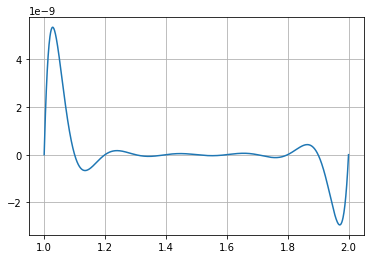

In [2]:
import numpy as np
from math import exp, log, factorial
import matplotlib.pyplot as plt

a = 1.0
b = 2.0
N = 10
delta = (b - a) / N
alpha = 1.7

points = [a + i * delta for i in range(N + 1)]

def f(x):
    return alpha * exp(-x) + (1 - alpha) * log(x)

def omega(k, x):
    global points
    result = 1
    for i in range(N + 1):
        if i != k:
            result *= (x - points[i])
    return result

def buildDiffs(points, funcVals):
    N = len(points) - 1
    A = np.zeros((N + 1, N + 2), dtype=np.double)
    for i in range(N + 1):
        A[i][0] = points[i]
        A[i][1] = f(points[i])
    for j in range(2, N + 2):
        for i in range(j - 1, N + 1):
            A[i][j] = (A[i][j - 1] - A[i - 1][j - 1]) / (A[i][0] - A[i - j + 1][0])
    return A

def prod(i, points):
    return lambda x: np.prod(np.array([(x - points[j]) for j in range(i)], dtype=np.double))

def getSolution(diffs, points):
    return lambda x: np.sum(np.array([diffs[i][i + 1] * prod(i, points)(x) for i in range(N + 1)], dtype=np.double))

def deficiency(x, solution):
    global points
    pointsX = [x] + points
    return omega(N + 1, x) * buildDiffs(pointsX, solution(x) + [f(x) for x in points])[-1][-1]

def plotDifference(samples, solution):
    space = np.linspace(a, b, samples)
    plt.grid()
    plt.plot(space, np.array([solution(x) - f(x) for x in space], dtype=np.double))
    plt.savefig("../TeX/Interpolation/NewtonDiff.png")
    plt.show()

if __name__ == "__main__":
    A = buildDiffs(points, [f(x) for x in points])
    solution = getSolution(A, points)
    
    check = [points[0] + delta / 2.6, 
             points[5] + delta / 2.6,
             points[9] + delta / 2.6]
    
    [print("Pn({0}) = {1}".format(x, solution(x))) for x in check]
    print()
    [print("rn({0}) = {1}".format(x, solution(x) - f(x))) for x in check]
    print()
    
    space = np.linspace(a, b, 1000)
    print("Real deficiency on whole interval: " + 
          str(np.max(np.abs(np.array([(solution(x) - f(x)) for x in space], dtype=np.double)))))
    print()
    
    
    print("Expected deficiency in control points: " + 
          str(np.abs(np.array([deficiency(x, solution) for x in check], dtype=np.double))))
    print()
    print("Real deficiency on control points: " + 
          str(np.max(np.abs(np.array([(solution(x) - f(x)) for x in check], dtype=np.double)))))
    
    plotDifference(1000, solution)